In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [81]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [82]:
df.shape

(731, 16)

In [83]:
df_graph=pd.DataFrame(df.groupby('weekday')['cnt'].sum())

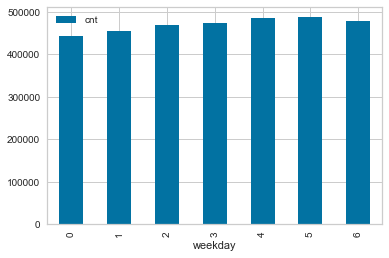

In [84]:
df_graph.plot(kind='bar')

In [85]:
df_graph=pd.DataFrame(df.groupby('season')['cnt'].sum())

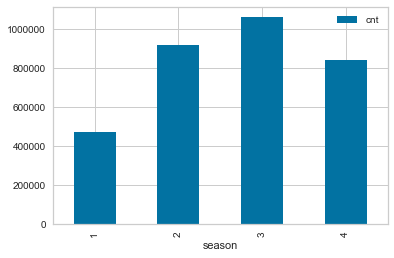

In [86]:
df_graph.plot(kind='bar')

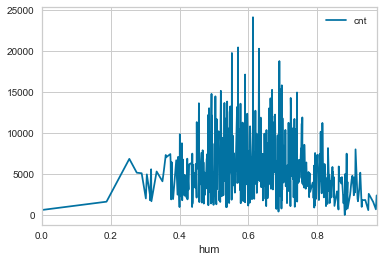

In [87]:
df_graph_weather=pd.DataFrame(df.groupby('hum')['cnt'].sum())
df_graph_weather.plot(kind='line')

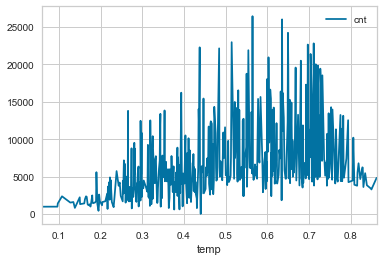

In [88]:
df_graph_weather=pd.DataFrame(df.groupby('temp')['cnt'].sum())
df_graph_weather.plot(kind='line')

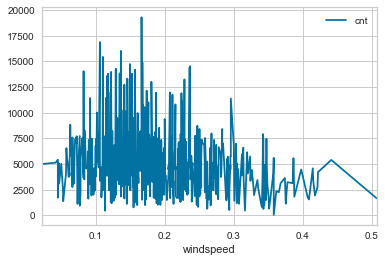

In [89]:
df_graph_weather=pd.DataFrame(df.groupby('windspeed')['cnt'].sum())
df_graph_weather.plot(kind='line')

In [90]:
X = df.drop(['cnt','casual','registered','dteday','dteday','season','yr','mnth','holiday','weekday','workingday','weathersit'],axis =1)
y = df['cnt']
test_size = .25
seed = 8
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size =test_size, random_state = seed)

In [91]:
X_train.head()

,instant,temp,atemp,hum,windspeed
353,354,0.385833,0.396454,0.595417,0.061571
512,513,0.690000,0.641425,0.697083,0.215171
523,524,0.602500,0.569442,0.567083,0.157350
488,489,0.560000,0.537242,0.768333,0.133696
176,177,0.680000,0.637629,0.513333,0.094533


In [92]:
X_train.shape

(548, 5)

In [93]:
result = model_selection.cross_val_score(LogisticRegression(),X_train,y_train,cv=2,n_jobs=-1,scoring="accuracy")
print(result)

C:\Users\grace.zhao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


[0.00378788 0.        ]
